In [70]:
import matplotlib.dates as mdates
#from matplotlib.finance import candlestick_ohlc
import datetime
from datetime import date
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt
import matplotlib.ticker as mticker
import functools
sns.set()

In [2]:
class Volume:
  def __init__(self, stock, value):
    self.stock = stock
    self.value = value


def yahoo(symbols, start_date, end_date):
    yf.pdr_override()       
    stocks_yahoo = pdr.get_data_yahoo(symbols, start_date, end_date,   as_panel = False,)
    return stocks_yahoo


def get_best_stocks(indice_name):
    print(f"2019.09.28 {indice_name}.xls")
    data = pd.read_html(f"./indices/2019.09.30 {indice_name}.xls")[0]['Código']
    data.to_frame()
    data.values
    symbols=list(data.values)

    Stocks=[]
    for symbol in symbols:
        if len(symbol)==5:
            Stocks.append(symbol)

    Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]

    start_date = dt.datetime.now() - dt.timedelta(days=2*365)
    end_date = dt.datetime.now()

    all_stocks = yahoo(Stocks, start_date, end_date)
    
    volumes = all_stocks['Volume']
    volumes_columns = list(volumes)

    volumes_summation = []
    for i in volumes_columns:
        volume_object = Volume(i, volumes[i].sum())
        volumes_summation.append(volume_object)


    volumes_summation.sort(key=lambda x: x.value, reverse=True)
    best_volumes = volumes_summation[0:3]
    return best_volumes

In [3]:
indices = ["IFNC", "IMOB", "ICON", "UTIL", "IEE"]
best_indices = []
for indice in indices:
    best_stocks = get_best_stocks(indice)
    best_indices.append(best_stocks[0].stock)
    best_indices.append(best_stocks[1].stock)
    best_indices.append(best_stocks[2].stock)

2019.09.28 IFNC.xls
[*********************100%***********************]  15 of 15 downloaded
2019.09.28 IMOB.xls
[*********************100%***********************]  14 of 14 downloaded
2019.09.28 ICON.xls
[*********************100%***********************]  54 of 54 downloaded
2019.09.28 UTIL.xls
[*********************100%***********************]  17 of 17 downloaded
2019.09.28 IEE.xls
[*********************100%***********************]  15 of 15 downloaded


In [4]:
start_date = dt.datetime.now() - dt.timedelta(days=2*365)
end_date = dt.datetime.now()

stocks = yahoo(best_indices, start_date, end_date)

[*********************100%***********************]  12 of 12 downloaded


Text(0.5, 1, 'Correlação entre os ativos')

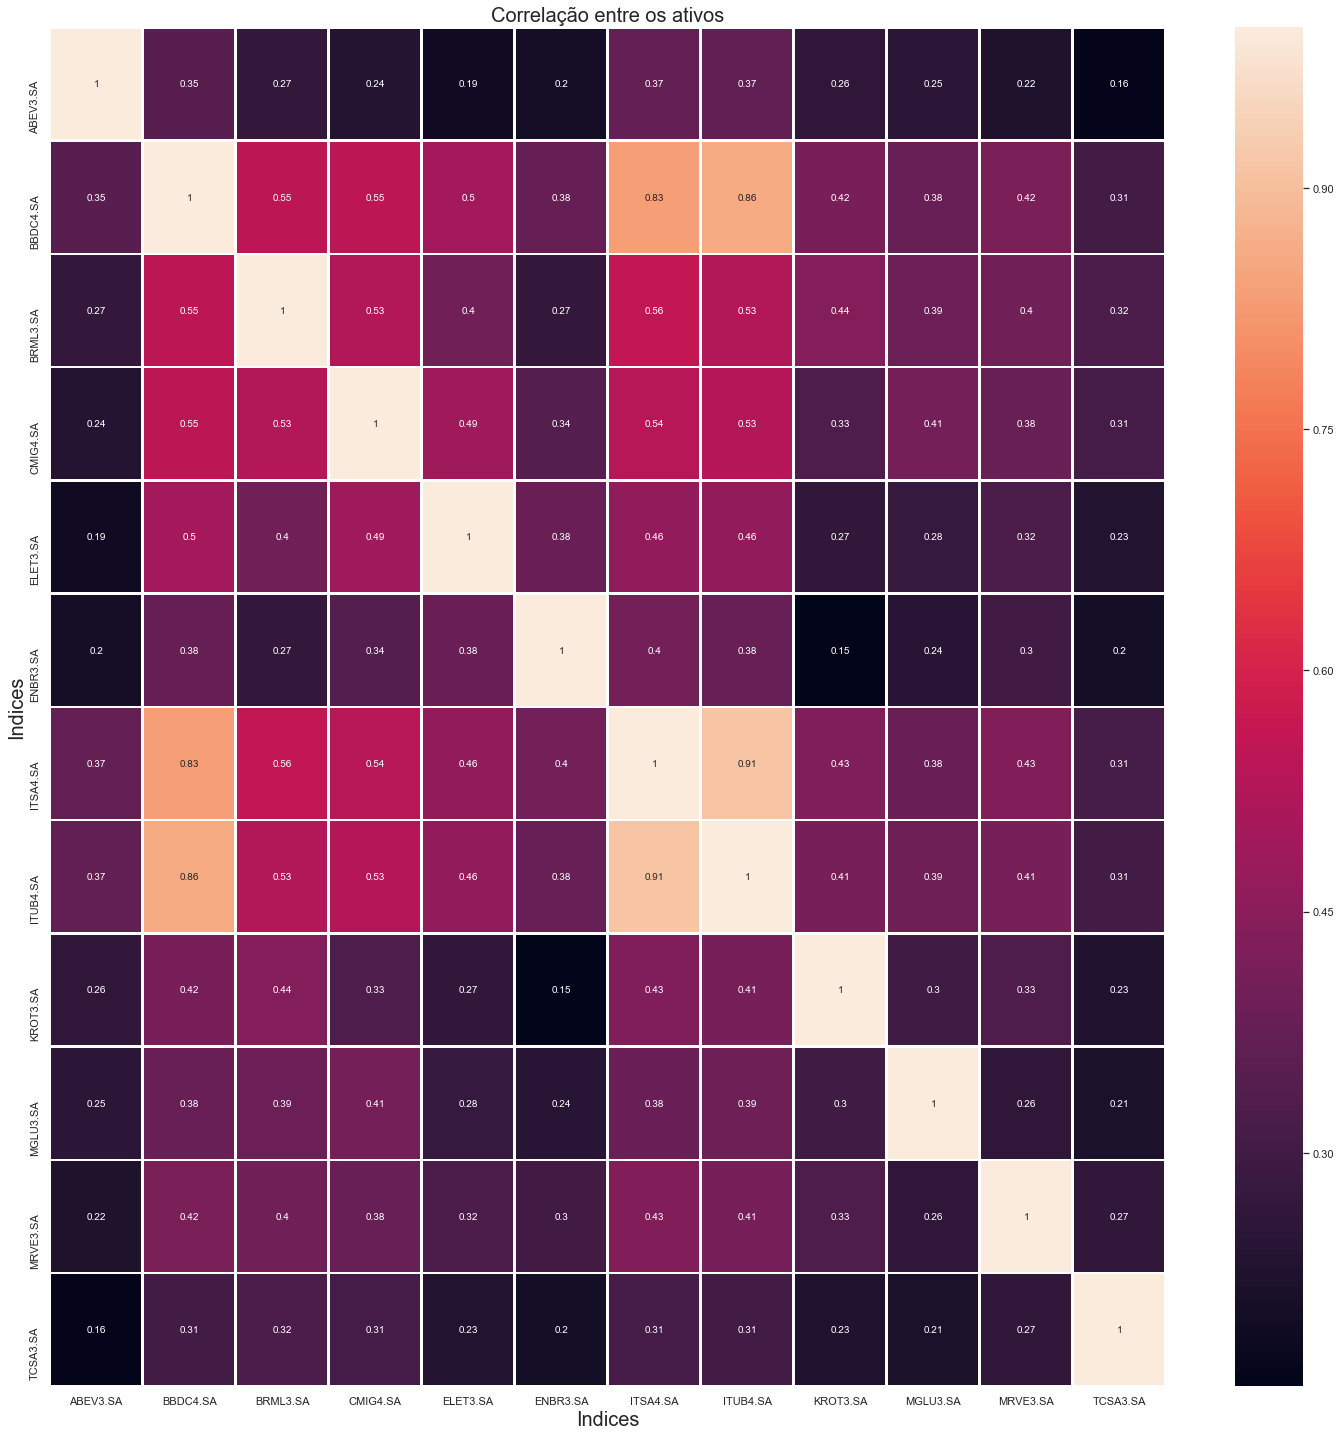

In [5]:
stocks_corr = stocks['Adj Close'].pct_change().iloc[1:].corr()
fig = plt.subplots(figsize=(25,25))
ax2=plt.subplot(1,1,1)  
sns.heatmap(stocks_corr, annot=True, linewidths=1.5, ax=ax2)

ax2.set_ylabel("Indices",fontsize=20)  
ax2.set_xlabel("Indices",fontsize=20)  
ax2.set_title("Correlação entre os ativos",fontsize=20)    

In [14]:
mean_stocks = []
for i in range(len(stocks_corr)):
    mean_stocks.append([stocks_corr.columns[i], stocks_corr.iloc[i].mean()])

mean_stocks.sort(key=lambda x: x[1])
lowest_mean_corr = mean_stocks[0:5]
lowest_mean_corr_name = list(list(zip(*lowest_mean_corr))[0])

In [71]:
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
from matplotlib.dates import date2num

[*********************100%***********************]  5 of 5 downloaded


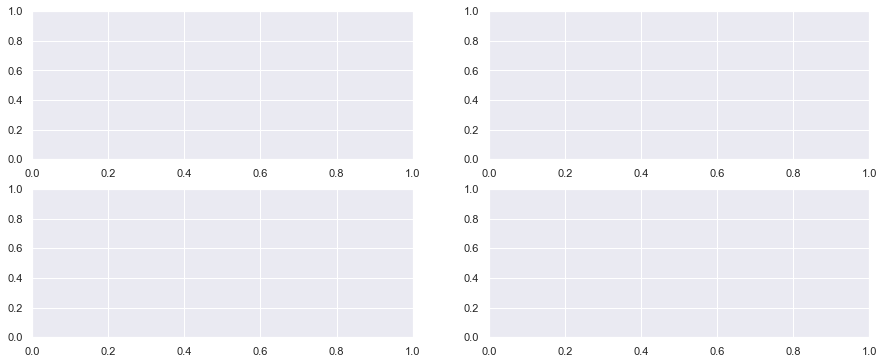

In [114]:
ax1 = plt.subplot2grid((1,1), (0,0))
start_date = dt.datetime.now() - dt.timedelta(days=2*365)
end_date = dt.datetime.now()

lowest_corr_stocks = yahoo(lowest_mean_corr_name, start_date, end_date)

In [116]:
lowest_corr_stocks['Date'] = lowest_corr_stocks.index.values
lowest_corr_stocks['Date'] = pd.to_datetime(lowest_corr_stocks['Date'])
lowest_corr_stocks["Date"] = lowest_corr_stocks["Date"].apply(mdates.date2num)

ohlc= lowest_corr_stocks[['Date', 'Open', 'High', 'Low','Close']].copy()

In [117]:
candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.grid(True)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Candlestick")
plt.legend()
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()

ValueError: not enough values to unpack (expected 5, got 2)